In [1]:
# The current model is not build to distinguish the blood component difference of male and female 
import pandas as pd
import numpy as np

from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_blood = pd.read_csv("D:/Programming/HC Project/Dataset/Dataset_Compiled - Blood Test.csv")

In [3]:
data_blood.head()

,Gender,Red blood cell(RBC) count,Hemoglobin (Hb),Hematocrit,Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),Platelet count,White blood cell (WBC) count,Predictions
0,Female,6.04,12.70,39.92,95.68,21.68,516,10649,1
1,Female,4.72,12.07,45.02,78.62,26.83,560,6525,1
2,Male,4.87,13.85,40.60,83.00,31.00,154,8763,0
3,Male,4.66,16.32,41.90,87.00,29.00,382,5851,0
4,Male,4.39,13.46,43.60,75.40,23.30,514,6360,1


In [4]:
data_blood.tail()

,Gender,Red blood cell(RBC) count,Hemoglobin (Hb),Hematocrit,Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),Platelet count,White blood cell (WBC) count,Predictions
1010,Female,4.70,16.51,45.7,93.0,27.0,177,5679,0
1011,Male,4.14,14.43,45.3,90.0,27.0,326,8053,0
1012,Male,4.35,12.61,40.8,66.6,20.3,779,11535,1
1013,Male,4.91,12.77,39.5,87.0,29.0,321,5510,0
1014,Female,4.08,16.52,49.5,82.0,28.0,172,7039,0


In [5]:
data_blood.columns

Index(['Gender', 'Red blood cell(RBC) count', 'Hemoglobin (Hb)', 'Hematocrit',
       'Mean corpuscular volume (MCV)', 'Mean corpuscular hemoglobin (MCH)',
       'Platelet count', 'White blood cell (WBC) count', 'Predictions'],
      dtype='object')

In [6]:
data_blood.shape

(1015, 9)

In [7]:
data_blood.describe()

,Red blood cell(RBC) count,Hemoglobin (Hb),Hematocrit,Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),Platelet count,White blood cell (WBC) count,Predictions
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,4.414966,14.563517,43.540700,81.573882,25.727901,472.875862,8235.751724,0.507389
std,0.304207,1.411858,3.811704,9.334265,3.649388,210.301283,3464.004219,0.500192
min,3.810000,11.200000,30.900000,62.800000,18.200000,150.000000,4503.000000,0.000000
25%,4.150000,13.340000,40.300000,73.730000,22.410000,278.500000,6690.000000,0.000000
50%,4.430000,14.570000,43.700000,83.000000,27.000000,512.000000,8067.000000,1.000000
75%,4.660000,15.810000,46.900000,89.765000,29.000000,660.000000,9574.500000,1.000000
max,6.420000,16.970000,49.900000,96.700000,31.000000,819.000000,100600.000000,1.000000


In [8]:
data_blood.isnull().sum()

Gender                               0
Red blood cell(RBC) count            0
Hemoglobin (Hb)                      0
Hematocrit                           0
Mean corpuscular volume (MCV)        0
Mean corpuscular hemoglobin (MCH)    0
Platelet count                       0
White blood cell (WBC) count         0
Predictions                          0
dtype: int64

In [9]:
data_blood['Predictions'].unique()

array([1, 0], dtype=int64)

In [10]:
data_blood.dtypes

Gender                                object
Red blood cell(RBC) count            float64
Hemoglobin (Hb)                      float64
Hematocrit                           float64
Mean corpuscular volume (MCV)        float64
Mean corpuscular hemoglobin (MCH)    float64
Platelet count                         int64
White blood cell (WBC) count           int64
Predictions                            int64
dtype: object

In [11]:
data_blood['Predictions'].value_counts()

1    515
0    500
Name: Predictions, dtype: int64

<AxesSubplot:>

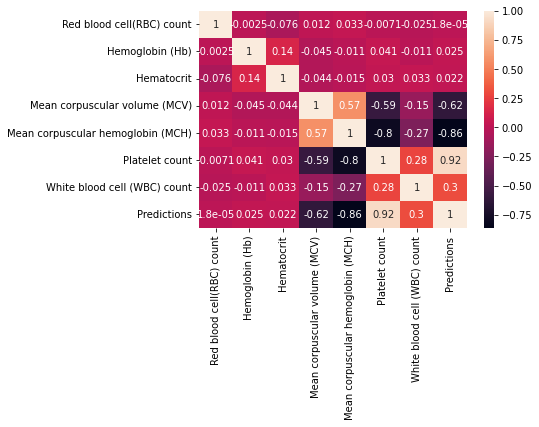

In [12]:
sns.heatmap(data_blood.corr(), annot=True)

## Seperating feature and target label

In [13]:
features = data_blood[['Red blood cell(RBC) count', 'Hemoglobin (Hb)', 'Hematocrit',
       'Mean corpuscular volume (MCV)', 'Mean corpuscular hemoglobin (MCH)',
       'Platelet count', 'White blood cell (WBC) count',]]
target = data_blood['Predictions']
predictions = data_blood['Predictions']

In [14]:
acc = []
model = []

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
#Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target, cv=5)

In [19]:
score

array([1., 1., 1., 1., 1.])

### Saving Model DecisionTree

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9950738916256158
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.99      0.99        98

    accuracy                           1.00       203
   macro avg       1.00      0.99      1.00       203
weighted avg       1.00      1.00      1.00       203



In [21]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1.        , 0.99507389, 1.        , 1.        , 1.        ])

### Saving Model Gaussian Naive Bayes

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9950738916256158
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.99      0.99        98

    accuracy                           1.00       203
   macro avg       1.00      0.99      1.00       203
weighted avg       1.00      1.00      1.00       203



In [23]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)

In [24]:
score

array([0.89162562, 0.88669951, 0.9408867 , 0.89162562, 0.92118227])

### Saving Model SVM 

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [26]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)

In [27]:
score

array([1.        , 1.        , 0.99507389, 1.        , 1.        ])

### Saving Model LR 

In [ ]:
#run this cell when model is good
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [29]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)

In [30]:
score

array([1., 1., 1., 1., 1.])

### Saving Model Random Forest 

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [31]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[23:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [32]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)

[23:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [33]:
score

array([1., 1., 1., 1., 1.])

### Saving Model XGBoost 

In [ ]:
#run this cell when all the models are working
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

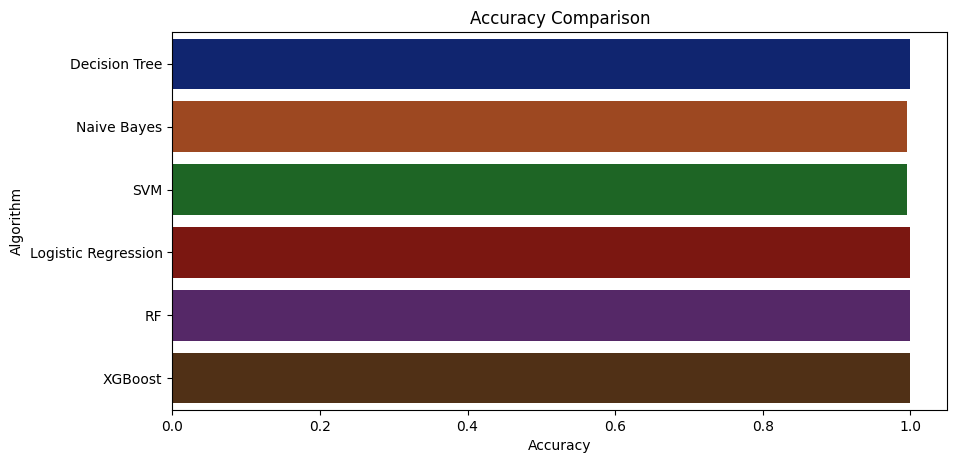

In [34]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [35]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
Naive Bayes --> 0.9950738916256158
SVM --> 0.9950738916256158
Logistic Regression --> 1.0
RF --> 1.0
XGBoost --> 1.0


# Making Prediction

In [36]:
data = np.array([[6.2, 15.9, 44.3, 89.3, 24.02, 230, 6423]])
prediction = XB.predict(data)
print(prediction)

[0]
